<a href="https://colab.research.google.com/github/jangbulama/ai-workshop-1/blob/main/1_W8_Text_Classification_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

# Build a Text Cleaning Pipeline

# Text Classification using Machine Learning Models


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


#Load the Dataset

In [ ]:
import pandas as pd

# Load the CSV file, ensuring correct file path and encoding
df = pd.read_csv('/content/trum_tweet_sentiment_analysis.csv', encoding='latin-1')  # or 'utf-8', depending on file

# Print the actual column names for inspection
print("Columns in dataframe:", df.columns)

# Check and potentially adjust column names
text_column = 'text'  # or the actual column name for text if different
label_column = 'Sentiment' # or the actual column name for label if different

# Ensure required columns exist (using adjusted names if needed)
assert text_column in df.columns and label_column in df.columns, f"Dataset must contain '{text_column}' and '{label_column}' columns."


# Check the first few rows
print(df.head())

Columns in dataframe: Index(['text', 'Sentiment'], dtype='object')
                                                text  Sentiment
0  RT @JohnLeguizamo: #trump not draining swamp b...          0
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0
2  Trump protests: LGBTQ rally in New York https:...          1
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0


#Text Cleaning and Tokenization

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the necessary resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs and mentions
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(cleaned)

# Apply to dataset
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  RT @JohnLeguizamo: #trump not draining swamp b...   
1  ICYMI: Hackers Rig FM Radio Stations To Play A...   
2  Trump protests: LGBTQ rally in New York https:...   
3  "Hi I'm Piers Morgan. David Beckham is awful b...   
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...   

                                        cleaned_text  
0  rt trump draining swamp taxpayer dollar trip a...  
1  icymi hacker rig fm radio station play antitru...  
2    trump protest lgbtq rally new york bbcworld via  
3  hi im pier morgan david beckham awful donald t...  
4  rt tech firm suing buzzfeed publishing unverif...  


# Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size for performance
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95    248563
           1       0.91      0.86      0.88    121462

    accuracy                           0.93    370025
   macro avg       0.92      0.91      0.91    370025
weighted avg       0.93      0.93      0.93    370025



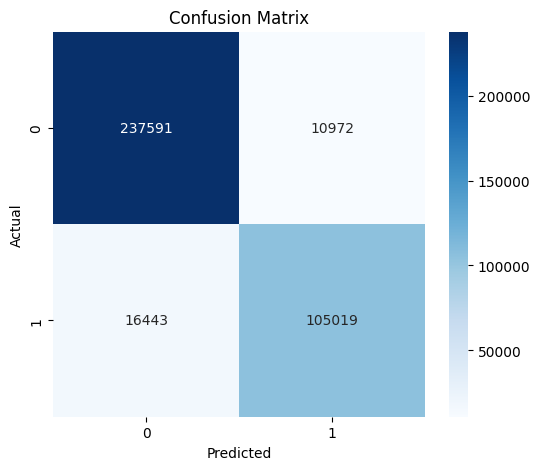

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
